# Programs EXPERT

Esta tabla contiene la información a nivel de programa de la clase EXPERT. Es decir, contiene el porcentaje de clases definidas en el programa, el porcentaje de interfaces y el porcentaje de enumerados. También podemos encontrar otros dos campos que nos indican si el código está en el paquete por defecto o si hay código otros paquetes.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'program__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('programs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-14 13:28:10.093791 Data cache files found ...
2024-05-14 13:28:10.094827 Data cache files successfully loaded!!
The dataset contains 1591 (98.88%) instances for BEGINNER class and 18 (1.119%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name and features.
TABLE_NAME = 'programs'
TABLE_FEATURES = ['program__has_sub_dirs_with_code','program__has_packages','program__number_of_modules','program__number_of_sub_dirs_with_code','program__number_of_packages','program__class_defs_pct','program__function_defs_pct','program__enum_defs_pct','program__has_code_root_package','program__average_defs_per_module']

# Load features.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances of {TARGET_CLASS}. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

 EXPERT CLASS Features shape: (18, 10)
As we can see the downloaded data contains a total of 18 instances of EXPERT. Each of the instances corresponds to a program. For each program we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 496 to 1608
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   program__has_sub_dirs_with_code        18 non-null     bool   
 1   program__has_packages                  18 non-null     bool   
 2   program__number_of_modules             18 non-null     int64  
 3   program__number_of_sub_dirs_with_code  18 non-null     int64  
 4   program__number_of_packages            18 non-null     int64  
 5   program__class_defs_pct                18 non-null     float64
 6   program__function_defs_pct             18 non-null     float64
 7   program__enum_defs_pct                 18 non-null     float64
 8   program__has_code_root_package         18 non-null     bool   
 9   program__average_defs_per_module       18 non-null     float64
dtypes: bool(3), float64(4), int64(3)
memory usage: 1.2 KB
None


Cómo podemos ver la tabla está compuesta por 7 variables numéricas, 3 variables boleanas.

### 2.1 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [0.0%] of duplicated entries.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

program__has_sub_dirs_with_code          0
program__has_packages                    0
program__number_of_modules               0
program__number_of_sub_dirs_with_code    0
program__number_of_packages              0
program__class_defs_pct                  0
program__function_defs_pct               0
program__enum_defs_pct                   0
program__has_code_root_package           0
program__average_defs_per_module         0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [6]:
print_empty_cols(X)

program__has_sub_dirs_with_code
-------------------------------
0 instancias no tienen un valor para la columna program__has_sub_dirs_with_code


program__has_packages
---------------------
0 instancias no tienen un valor para la columna program__has_packages


program__number_of_modules
--------------------------
0 instancias no tienen un valor para la columna program__number_of_modules


program__number_of_sub_dirs_with_code
-------------------------------------
0 instancias no tienen un valor para la columna program__number_of_sub_dirs_with_code


program__number_of_packages
---------------------------
0 instancias no tienen un valor para la columna program__number_of_packages


program__class_defs_pct
-----------------------
0 instancias no tienen un valor para la columna program__class_defs_pct


program__function_defs_pct
--------------------------
0 instancias no tienen un valor para la columna program__function_defs_pct


program__enum_defs_pct
----------------------
0 instanci

### 2.3 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
program__has_sub_dirs_with_code,18,2,True,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__has_packages,18,2,True,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__number_of_modules,18.0,NaN,NaN,NaN,616.777778,996.249883,15.0,119.25,304.5,565.5,3294.0
program__number_of_sub_dirs_with_code,18.0,NaN,NaN,NaN,32.333333,58.226737,0.0,3.25,7.5,39.25,238.0
program__number_of_packages,18.0,NaN,NaN,NaN,123.222222,306.259128,0.0,7.5,19.0,73.5,1297.0
program__class_defs_pct,18.0,NaN,NaN,NaN,0.355942,0.135173,0.162427,0.255583,0.356587,0.419024,0.624539
program__function_defs_pct,18.0,NaN,NaN,NaN,0.639417,0.134519,0.375461,0.578603,0.638059,0.740156,0.836595
program__enum_defs_pct,18.0,NaN,NaN,NaN,0.004641,0.005923,0.0,0.0,0.002072,0.007015,0.019078
program__has_code_root_package,18,2,True,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__average_defs_per_module,18.0,NaN,NaN,NaN,3.757913,2.341887,0.733333,2.063336,3.243456,4.729403,9.957198


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

### IMPORTANTE
Revisar programa con 3k modulos y 1k paquetes.

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "program__class_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "program__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "program__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 0.19
    "program__number_of_modules": [(1, 1), (2,2), (3,3), (4,inf)],  # min: 1 max: 3294
    "program__number_of_sub_dirs_with_code": [(0, 0), (0, inf)], # min: 0 max: 238
    "program__number_of_packages": [(0, 0), (0, inf)], # min: 0 max: 1297
    "program__average_defs_per_module": [(0, 0), (0, 1), (1, 3), (3, inf)], # min: 0 max: 26    
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code'], 10))
print(get_statistics(X_copy, ['program__has_packages'], 10))
print(get_statistics(X_copy, ['program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct'], 10))
print(get_statistics(X_copy, ['program__function_defs_pct'], 10))
print(get_statistics(X_copy, ['program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code'], 10))
print(get_statistics(X_copy, ['program__number_of_modules'], 10))
print(get_statistics(X_copy, ['program__number_of_packages'], 10))
print(get_statistics(X_copy, ['program__average_defs_per_module'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages'], 10))
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__has_packages', 'program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct', 'program__function_defs_pct'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct', 'program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__function_defs_pct', 'program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code', 'program__number_of_modules'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code', 'program__number_of_packages'], 10))
print(get_statistics(X_copy, ['program__number_of_modules', 'program__number_of_packages'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct', 'program__function_defs_pct', 'program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code', 'program__number_of_modules', 'program__number_of_packages'], 10))

--- SINGLE FEATURE ---
 program__has_sub_dirs_with_code  count  percentage
                            True     17   94.444444
                           False      1    5.555556

 program__has_packages  count  percentage
                  True     17   94.444444
                 False      1    5.555556

 program__has_code_root_package  count  percentage
                           True     13   72.222222
                          False      5   27.777778

program__class_defs_pct  count  percentage
              [0.0_inf]     18       100.0

program__function_defs_pct  count  percentage
                 [0.0_1.0)     18       100.0

program__enum_defs_pct  count  percentage
             [0.0_inf]     12   66.666667
             [0.0_0.0]      6   33.333333

program__number_of_sub_dirs_with_code  count  percentage
                              [0_inf]     17   94.444444
                                [0_0]      1    5.555556

program__number_of_modules  count  percentage
              

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (18, 10)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

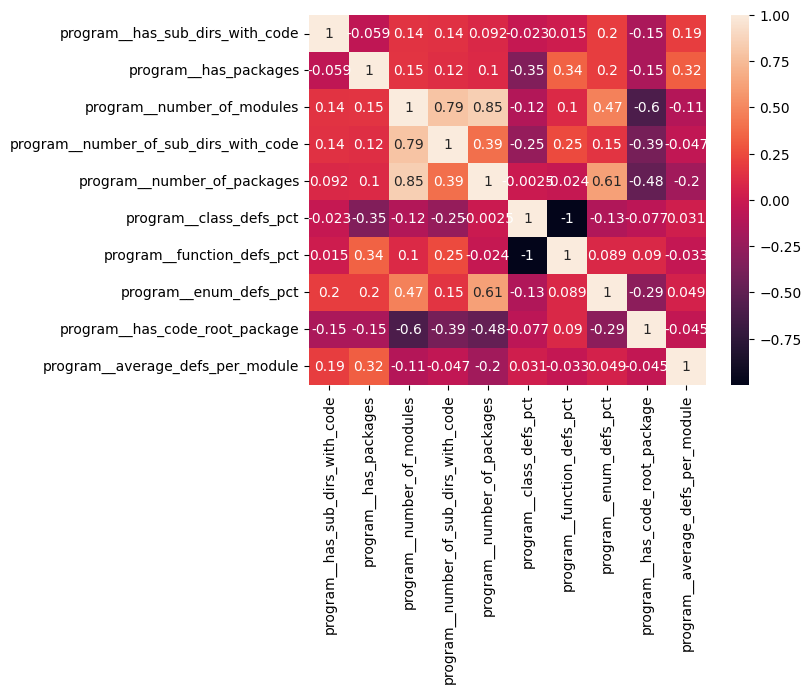

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado

### Variable has_sub_dirs_with_code (1/10)
Esta variable es de tipo booleano y representa si el programa contiene algún subdirectorio con código.

<Axes: xlabel='program__has_sub_dirs_with_code', ylabel='Count'>

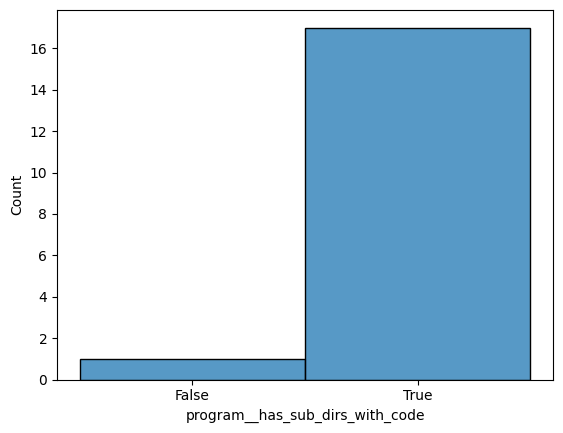

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['program__has_sub_dirs_with_code'], discrete=True)

In [12]:
num_true_values = len(X[X['program__has_sub_dirs_with_code'] == True])
num_false_values = len(X[X['program__has_sub_dirs_with_code'] == False])
std = X['program__has_sub_dirs_with_code'].std()
freq_true = len(X[X['program__has_sub_dirs_with_code'] == True]) / len(X['program__has_sub_dirs_with_code'])
freq_false = len(X[X['program__has_sub_dirs_with_code'] == False]) / len(X['program__has_sub_dirs_with_code'])
print(f'La variable has_sub_dirs_with_code contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a False es {freq_false}.')

La variable has_sub_dirs_with_code contiene 17 valores verdaderos y 1 valores falsos. Y, la desviación típica es de 0.2357022613286972
La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a True es 0.9444444444444444.
La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a False es 0.05555555555555555.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'program__has_sub_dirs_with_code', possible_values)

La variable program__has_sub_dirs_with_code contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable program__has_sub_dirs_with_code toma el valor de 1.0 en un 94.44% de los items.
La variable program__has_sub_dirs_with_code toma el valor de 0.0 en un 5.556% de los items.


Describimos los valores de las variables de la tabla, cuando la variable tiene el valor a False.

In [14]:
X[X['program__has_sub_dirs_with_code'] == False].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000
mean,0.0,1.0,49.0,0.0,10.0,0.368421,0.631579,0.0,1.0,1.938776
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,1.0,49.0,0.0,10.0,0.368421,0.631579,0.0,1.0,1.938776
25%,0.0,1.0,49.0,0.0,10.0,0.368421,0.631579,0.0,1.0,1.938776
50%,0.0,1.0,49.0,0.0,10.0,0.368421,0.631579,0.0,1.0,1.938776
75%,0.0,1.0,49.0,0.0,10.0,0.368421,0.631579,0.0,1.0,1.938776
max,0.0,1.0,49.0,0.0,10.0,0.368421,0.631579,0.0,1.0,1.938776


### IMPORTANTE

Hay 1 programa que no tiene subdirectorios con código.

### Variable has_packages (2/10)
Esta variable es de tipo booleano y representa si el programa contiene algún paquete. 

<Axes: xlabel='program__has_packages', ylabel='Count'>

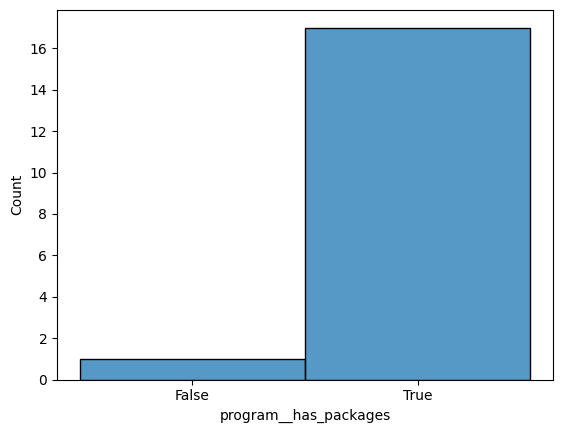

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['program__has_packages'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['program__has_packages'] == True])
num_false_values = len(X[X['program__has_packages'] == False])
std = X['program__has_packages'].std()
freq_true = len(X[X['program__has_packages'] == True]) / len(X['program__has_packages'])
freq_false = len(X[X['program__has_packages'] == False]) / len(X['program__has_packages'])
print(f'La variable program__has_packages contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable program__has_packages a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable program__has_packages a False es {freq_false}.')

La variable program__has_packages contiene 17 valores verdaderos y 1 valores falsos. Y, la desviación típica es de 0.2357022613286972
La frecuencia con la que programa puede tener la variable program__has_packages a True es 0.9444444444444444.
La frecuencia con la que programa puede tener la variable program__has_packages a False es 0.05555555555555555.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'program__has_packages', possible_values)

La variable program__has_packages contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable program__has_packages toma el valor de 1.0 en un 94.44% de los items.
La variable program__has_packages toma el valor de 0.0 en un 5.556% de los items.


In [18]:
X[X['program__has_packages'] == False].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000
mean,1.0,0.0,15.0,4.0,0.0,0.545455,0.454545,0.0,1.0,0.733333
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,0.0,15.0,4.0,0.0,0.545455,0.454545,0.0,1.0,0.733333
25%,1.0,0.0,15.0,4.0,0.0,0.545455,0.454545,0.0,1.0,0.733333
50%,1.0,0.0,15.0,4.0,0.0,0.545455,0.454545,0.0,1.0,0.733333
75%,1.0,0.0,15.0,4.0,0.0,0.545455,0.454545,0.0,1.0,0.733333
max,1.0,0.0,15.0,4.0,0.0,0.545455,0.454545,0.0,1.0,0.733333


### IMPORTANTE

Hay 1 programa que no tiene paquetes. 

### Variable has_code_root_packages (3/10)
Esta variable es de tipo booleano y representa si el programa contiene código en el directorio root.

<Axes: xlabel='program__has_code_root_package', ylabel='Count'>

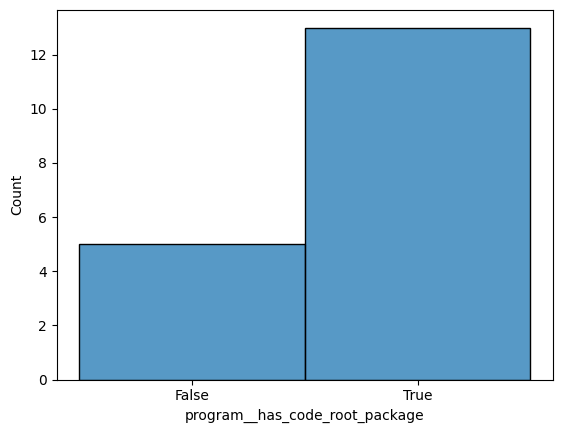

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['program__has_code_root_package'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['program__has_code_root_package'] == True])
num_false_values = len(X[X['program__has_code_root_package'] == False])
std = X['program__has_code_root_package'].std()
freq_true = len(X[X['program__has_code_root_package'] == True]) / len(X['program__has_code_root_package'])
freq_false = len(X[X['program__has_code_root_package'] == False]) / len(X['program__has_code_root_package'])
print(f'La variable program__has_code_root_package contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable program__has_code_root_package a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable program__has_code_root_package a False es {freq_false}.')

La variable program__has_code_root_package contiene 13 valores verdaderos y 5 valores falsos. Y, la desviación típica es de 0.4608885943889618
La frecuencia con la que programa puede tener la variable program__has_code_root_package a True es 0.7222222222222222.
La frecuencia con la que programa puede tener la variable program__has_code_root_package a False es 0.2777777777777778.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'program__has_code_root_package', possible_values)

La variable program__has_code_root_package contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable program__has_code_root_package toma el valor de 1.0 en un 72.22% de los items.
La variable program__has_code_root_package toma el valor de 0.0 en un 27.78% de los items.


In [22]:
X[X['program__has_code_root_package'] == False].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000
mean,1.0,1.0,1550.000000,68.199997,354.799988,0.372176,0.620500,0.007324,0.0,3.922878
std,0.0,0.0,1596.469238,98.082619,548.381897,0.147461,0.145035,0.007107,0.0,1.456639
min,1.0,1.0,118.000000,8.000000,5.000000,0.248424,0.375461,0.000000,0.0,1.829994
25%,1.0,1.0,396.000000,9.000000,38.000000,0.302200,0.611977,0.004658,0.0,3.079819
50%,1.0,1.0,664.000000,18.000000,52.000000,0.316770,0.678571,0.005551,0.0,4.451495
75%,1.0,1.0,3278.000000,68.000000,382.000000,0.368945,0.690465,0.007335,0.0,4.795455
max,1.0,1.0,3294.000000,238.000000,1297.000000,0.624539,0.746025,0.019078,0.0,5.457627


### Variable number_of_modules (4/10)
Esta variable es de tipo numérica y nos indica el número de modulos definidos en el programa. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 15 - 3294. Con una media de 616,7.

<Axes: ylabel='program__number_of_modules'>

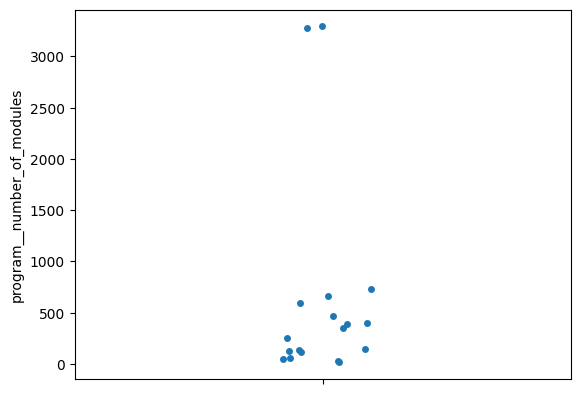

In [23]:
sns.stripplot(X['program__number_of_modules'])

### IMPORTANTE
Los dos valores máximos están muy alejados de los otros.

In [24]:
print_outliers_for_df_column(X, 'program__number_of_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.14570301283778547
Rango valores atípicos extremos (Tukey): [-1219.5,1904.25]
Rango valores atípicos leves (Tukey): [-550.125,1234.875]
Rango valores atípicos extremos (Fixed BoxPlot): [-282.72258761026694,1764.3960961955888]
-3.0IQR: 0 instancias tienen un valor para program__number_of_modules inferior a -1219.5 (Q1-3*IQR) para program__number_of_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__number_of_modules inferior a -550.125 (Q1-1.5*IQR) para program__number_of_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 2 instancias tienen un valor para program__number_of_modules superior a 1234.875 (Q3+1.5*IQR) para program__number_of_modules. Representando un 11.11% del total de instancias.
+3.0IQR: 2 instancias tienen un valor para program__number_of_modules superior a 1904.25 (Q3-3*IQR) para program__number_of_modules. Representando un 11.11% del total 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 148 (Con un MC de 97 usamos U)

In [25]:
X[X['program__number_of_modules'] > 1904].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000
mean,1.0,1.0,3286.000000,153.000000,839.500000,0.308684,0.679001,0.012314,0.0,3.140744
std,0.0,0.0,11.313708,120.208153,647.002686,0.085221,0.094786,0.009565,0.0,1.853681
min,1.0,1.0,3278.000000,68.000000,382.000000,0.248424,0.611977,0.005551,0.0,1.829994
25%,1.0,1.0,3282.000000,110.500000,610.750000,0.278554,0.645489,0.008933,0.0,2.485369
50%,1.0,1.0,3286.000000,153.000000,839.500000,0.308684,0.679001,0.012314,0.0,3.140744
75%,1.0,1.0,3290.000000,195.500000,1068.250000,0.338815,0.712513,0.015696,0.0,3.796120
max,1.0,1.0,3294.000000,238.000000,1297.000000,0.368945,0.746025,0.019078,0.0,4.451495


### IMPORTANTE

Hay 2 programas que tienen un número de módulos muy elevado. Estos programas son llama_index y ray.

### Variable number_of_sub_dirs_with_code (5/10)
Esta variable representa el número de subdirectorios con ficheros python pero sin un __init__.py en ellos. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 238. Con una media de 32,33.

<Axes: ylabel='program__number_of_sub_dirs_with_code'>

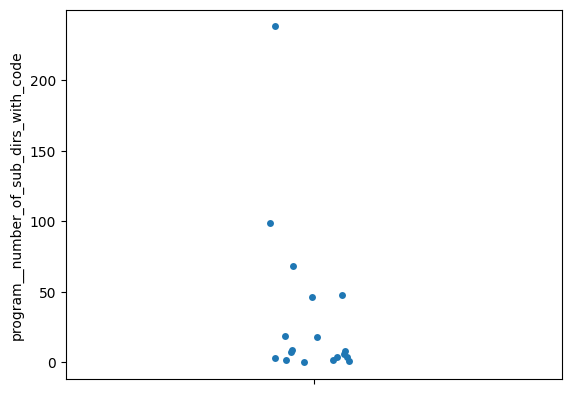

In [26]:
sns.stripplot(X['program__number_of_sub_dirs_with_code'])

El valor máximo está muy alejado del siguiente. 

In [27]:
print_outliers_for_df_column(X, 'program__number_of_sub_dirs_with_code')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.16912823588113263
Rango valores atípicos extremos (Tukey): [-104.75,147.25]
Rango valores atípicos leves (Tukey): [-50.75,93.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-26.625394673124937,145.46836157917954]
-3.0IQR: 0 instancias tienen un valor para program__number_of_sub_dirs_with_code inferior a -104.75 (Q1-3*IQR) para program__number_of_sub_dirs_with_code. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__number_of_sub_dirs_with_code inferior a -50.75 (Q1-1.5*IQR) para program__number_of_sub_dirs_with_code. Representando un 0.0% del total de instancias.
+1.5IQR: 2 instancias tienen un valor para program__number_of_sub_dirs_with_code superior a 93.25 (Q3+1.5*IQR) para program__number_of_sub_dirs_with_code. Representando un 11.11% del total de instancias.
+3.0IQR: 1 instancias tienen un valor para program__number_of_sub_dirs_with_code superior a 147.25 (Q3-3*IQR) pa

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 145 (Con un MC de 16 usamos U)

In [28]:
X[X['program__number_of_sub_dirs_with_code'] > 145].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
mean,1.0,1.0,3278.0,238.0,382.0,0.248424,0.746025,0.005551,0.0,4.451495
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.0,3278.0,238.0,382.0,0.248424,0.746025,0.005551,0.0,4.451495
25%,1.0,1.0,3278.0,238.0,382.0,0.248424,0.746025,0.005551,0.0,4.451495
50%,1.0,1.0,3278.0,238.0,382.0,0.248424,0.746025,0.005551,0.0,4.451495
75%,1.0,1.0,3278.0,238.0,382.0,0.248424,0.746025,0.005551,0.0,4.451495
max,1.0,1.0,3278.0,238.0,382.0,0.248424,0.746025,0.005551,0.0,4.451495


### IMPORTANTE

Hay 1 programa que tiene un número de subdirectorios con código muy elevado.

### Variable number_of_packages (6/10)
Esta variable representa el número de subdirectorios con ficheros python pero sin un __init__.py en ellos. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 1297. Con una media de 123,22.

<Axes: ylabel='program__number_of_packages'>

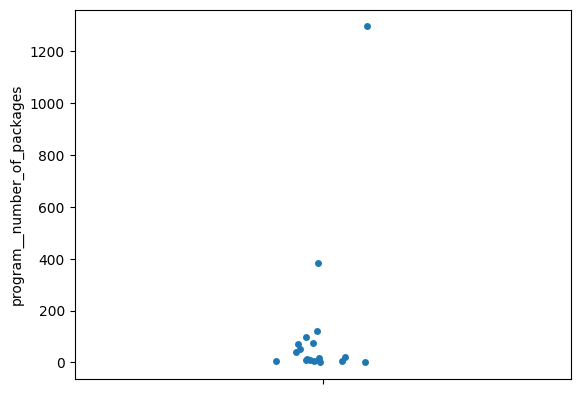

In [29]:
sns.stripplot(X['program__number_of_packages'])

### IMPORTANTE

Hay 2 programas que tienen un número de módulos muy elevado. Estos programas son llama_index y ray.

In [30]:
print_outliers_for_df_column(X, 'program__number_of_packages')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5875235348763919
Rango valores atípicos extremos (Tukey): [-190.5,271.5]
Rango valores atípicos leves (Tukey): [-91.5,172.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-5.1643059088011345,1111.6691308765949]
-3.0IQR: 0 instancias tienen un valor para program__number_of_packages inferior a -190.5 (Q1-3*IQR) para program__number_of_packages. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__number_of_packages inferior a -91.5 (Q1-1.5*IQR) para program__number_of_packages. Representando un 0.0% del total de instancias.
+1.5IQR: 2 instancias tienen un valor para program__number_of_packages superior a 172.5 (Q3+1.5*IQR) para program__number_of_packages. Representando un 11.11% del total de instancias.
+3.0IQR: 2 instancias tienen un valor para program__number_of_packages superior a 271.5 (Q3-3*IQR) para program__number_of_packages. Representando un 11.11% del total de instanci

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 172 (Con un MC de 58 usamos Tuckey)

In [31]:
X[X['program__number_of_packages'] > 172].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000
mean,1.0,1.0,3286.000000,153.000000,839.500000,0.308684,0.679001,0.012314,0.0,3.140744
std,0.0,0.0,11.313708,120.208153,647.002686,0.085221,0.094786,0.009565,0.0,1.853681
min,1.0,1.0,3278.000000,68.000000,382.000000,0.248424,0.611977,0.005551,0.0,1.829994
25%,1.0,1.0,3282.000000,110.500000,610.750000,0.278554,0.645489,0.008933,0.0,2.485369
50%,1.0,1.0,3286.000000,153.000000,839.500000,0.308684,0.679001,0.012314,0.0,3.140744
75%,1.0,1.0,3290.000000,195.500000,1068.250000,0.338815,0.712513,0.015696,0.0,3.796120
max,1.0,1.0,3294.000000,238.000000,1297.000000,0.368945,0.746025,0.019078,0.0,4.451495


### IMPORTANTE
Los casos especiales con number_of_packages > 172 son los ya mencionados proyectos llama_index y ray.

### Variable average_defs_per_module (7/10)
Esta variable es de tipo numérica y nos indica el número medio de definiciones en un módulo. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.73 - 0.95. Con una media de 3.75.

<Axes: ylabel='program__average_defs_per_module'>

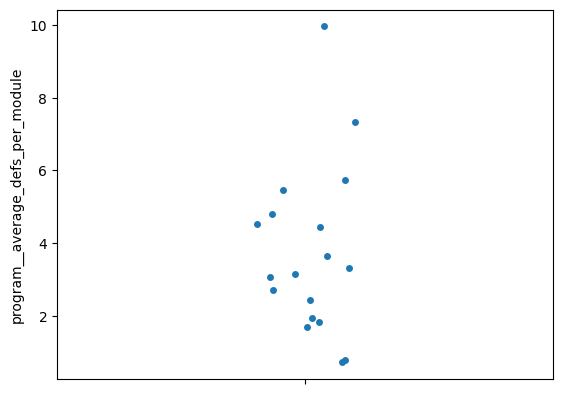

In [32]:
sns.stripplot(X['program__average_defs_per_module'])

In [33]:
print_outliers_for_df_column(X, 'program__average_defs_per_module')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5178948981072857
Rango valores atípicos extremos (Tukey): [-5.934865593910217,12.727605104446411]
Rango valores atípicos leves (Tukey): [-1.935764729976654,8.728504240512848]
Rango valores atípicos extremos (Fixed BoxPlot): [1.4105871262256036,36.471670619295]
-3.0IQR: 0 instancias tienen un valor para program__average_defs_per_module inferior a -5.934865593910217 (Q1-3*IQR) para program__average_defs_per_module. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__average_defs_per_module inferior a -1.935764729976654 (Q1-1.5*IQR) para program__average_defs_per_module. Representando un 0.0% del total de instancias.
+1.5IQR: 1 instancias tienen un valor para program__average_defs_per_module superior a 8.728504240512848 (Q3+1.5*IQR) para program__average_defs_per_module. Representando un 5.556% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__average_defs_

Describimos los valores de las variables de la tabla, cuando el valor de la variable es menor que 1.41 (Con un MC de 51 usamos Tuckey)

In [34]:
X[X['program__average_defs_per_module'] < 1.41].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000
mean,1.0,0.500000,35.500000,3.000000,2.500000,0.375000,0.625000,0.0,1.0,0.759524
std,0.0,0.707107,28.991379,1.414214,3.535534,0.241059,0.241059,0.0,0.0,0.037039
min,1.0,0.000000,15.000000,2.000000,0.000000,0.204545,0.454545,0.0,1.0,0.733333
25%,1.0,0.250000,25.250000,2.500000,1.250000,0.289773,0.539773,0.0,1.0,0.746429
50%,1.0,0.500000,35.500000,3.000000,2.500000,0.375000,0.625000,0.0,1.0,0.759524
75%,1.0,0.750000,45.750000,3.500000,3.750000,0.460227,0.710227,0.0,1.0,0.772619
max,1.0,1.000000,56.000000,4.000000,5.000000,0.545455,0.795455,0.0,1.0,0.785714


### IMPORTANTE

Hay 2 programas que tienen una media de definiciones por módulo muy baja.

### Variable class_defs_pct (8/10)
Esta variable representa el porcentage de las definiciones de un programa que son clases. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.35 - 1.0. Con una media de 0.62.

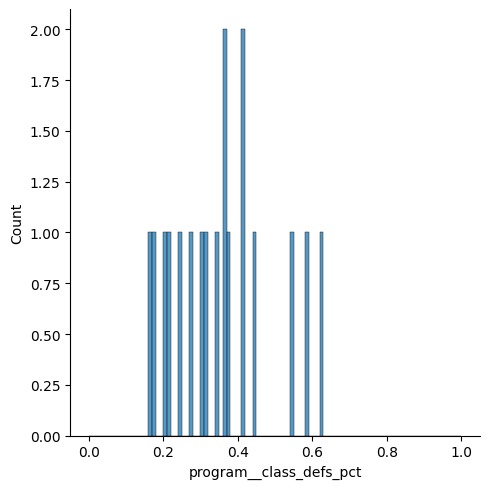

In [35]:
sns.displot(X['program__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [36]:
print_outliers_for_df_column(X, 'program__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.12874703098348061
Rango valores atípicos extremos (Tukey): [-0.2347385585308075,0.9093455113470554]
Rango valores atípicos leves (Tukey): [0.010422313585877419,0.6641846392303705]
Rango valores atípicos extremos (Fixed BoxPlot): [0.09935775894360674,0.8293295689746799]
-3.0IQR: 0 instancias tienen un valor para program__class_defs_pct inferior a -0.2347385585308075 (Q1-3*IQR) para program__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__class_defs_pct inferior a 0.010422313585877419 (Q1-1.5*IQR) para program__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__class_defs_pct superior a 0.6641846392303705 (Q3+1.5*IQR) para program__class_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__class_defs_pct superior a 0.9093455113470554 (Q3-3*IQR) 

No hace falta analizar los valores que estan en los extremos, ya que no hay valores que se salgan de la distribución.

In [37]:
X[X['program__class_defs_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.944444,0.944444,616.777771,32.333332,123.222221,0.355942,0.639417,0.004641,0.722222,3.757913
std,0.235702,0.235702,996.249878,58.226742,306.259125,0.135173,0.134519,0.005923,0.460889,2.341887
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.162427,0.375461,0.000000,0.000000,0.733333
25%,1.000000,1.000000,119.250000,3.250000,7.500000,0.255583,0.578603,0.000000,0.250000,2.063336
50%,1.000000,1.000000,304.500000,7.500000,19.000000,0.356587,0.638059,0.002072,1.000000,3.243456
75%,1.000000,1.000000,565.500000,39.250000,73.500000,0.419024,0.740156,0.007015,1.000000,4.729403
max,1.000000,1.000000,3294.000000,238.000000,1297.000000,0.624539,0.836595,0.019078,1.000000,9.957198


### Variable function_defs_pct (9/10)
Esta variable representa el porcentage de las definiciones de un programa que son clases. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.37 - 0.83. Con una media de 0,63.


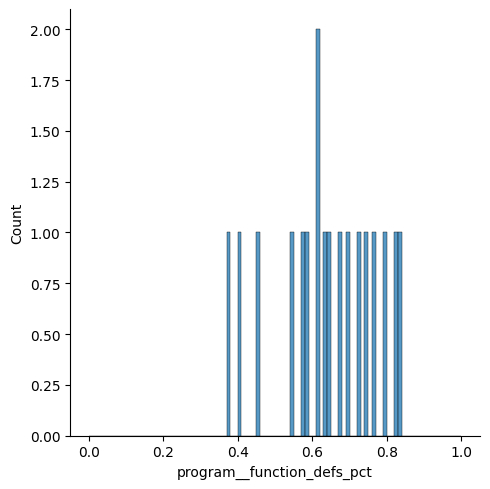

In [38]:
sns.displot(X['program__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [39]:
print_outliers_for_df_column(X, 'program__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.12776604728950702
Rango valores atípicos extremos (Tukey): [0.0939435362815857,1.2248151302337646]
Rango valores atípicos leves (Tukey): [0.3362731635570526,0.9824855029582977]
Rango valores atípicos extremos (Fixed BoxPlot): [0.423650428481245,1.144134951740257]
-3.0IQR: 0 instancias tienen un valor para program__function_defs_pct inferior a 0.0939435362815857 (Q1-3*IQR) para program__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__function_defs_pct inferior a 0.3362731635570526 (Q1-1.5*IQR) para program__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__function_defs_pct superior a 0.9824855029582977 (Q3+1.5*IQR) para program__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__function_defs_pct superior a 1.2248151302337646

Describimos los valores de las variables de la tabla, cuando el valor de la variable es menor que 0.43 (Con un MC de 12 usamos L)

In [40]:
X[X['program__function_defs_pct'] < 0.43].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1.0,1.0,265.500000,14.000000,22.500000,0.604903,0.392069,0.003027,0.500000,6.068098
std,0.0,0.0,184.554871,7.071068,21.920311,0.027769,0.023488,0.004281,0.707107,1.799789
min,1.0,1.0,135.000000,9.000000,7.000000,0.585267,0.375461,0.000000,0.000000,4.795455
25%,1.0,1.0,200.250000,11.500000,14.750000,0.595085,0.383765,0.001514,0.250000,5.431776
50%,1.0,1.0,265.500000,14.000000,22.500000,0.604903,0.392069,0.003027,0.500000,6.068098
75%,1.0,1.0,330.750000,16.500000,30.250000,0.614721,0.400374,0.004541,0.750000,6.704419
max,1.0,1.0,396.000000,19.000000,38.000000,0.624539,0.408678,0.006054,1.000000,7.340741


### IMPORTANTE

Hay 2 programas que tienen un porcentaje de definiciones de funciones muy bajo.

### Variable enum_defs_pct (10/10)
Esta variable representa el porcentage de las definiciones de un programa que son clases. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 0.01. Con un maximo de 0.0046

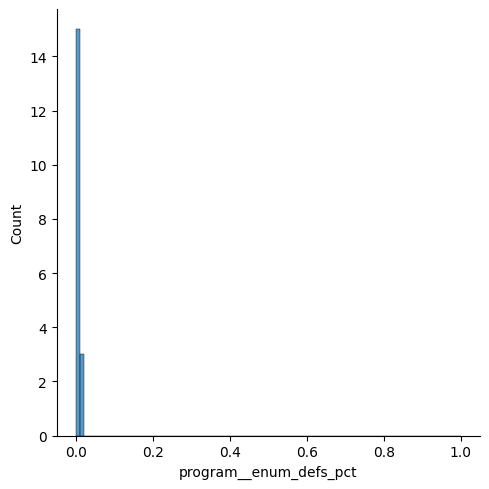

In [41]:
sns.displot(X['program__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [42]:
print_outliers_for_df_column(X, 'program__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4462777584840175
Rango valores atípicos extremos (Tukey): [-0.021044535445980728,0.02805938059464097]
Rango valores atípicos leves (Tukey): [-0.010522267722990364,0.017537112871650606]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0022067516495215818,0.06973010400915272]
-3.0IQR: 0 instancias tienen un valor para program__enum_defs_pct inferior a -0.021044535445980728 (Q1-3*IQR) para program__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__enum_defs_pct inferior a -0.010522267722990364 (Q1-1.5*IQR) para program__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1 instancias tienen un valor para program__enum_defs_pct superior a 0.017537112871650606 (Q3+1.5*IQR) para program__enum_defs_pct. Representando un 5.556% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__enum_defs_pct superior a 0.02805938059464097 (

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.017 (Con un MC de 44 usamos Tuckey)

In [43]:
X[X['program__enum_defs_pct'] > 0.018].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
mean,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
25%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
50%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
75%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
max,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994


### IMPORTANTE

Hay 1 programa que tiene un porcentaje de definiciones de enumerados muy elevado, comparado con el resto.

## Multivariate

TODO: isolation forest algorithm

In [44]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012

isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.to_numpy())
mask = isof_prediction == -1
multivar_outliers = X[mask].index.tolist()
full_table.iloc[multivar_outliers]

IndexError: positional indexers are out-of-bounds

Ambos outliers son los dos programas más grandes devueltos por la API de GitHub. ray y llama_index.